<a href="https://colab.research.google.com/github/AbdurahmonAloxonov/artificial-intelligence/blob/main/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:

np.random.seed(42)
num_samples = 1000
engine_size = np.random.uniform(1.0, 5.0, num_samples)  # 1.0L - 5.0L dvigatel hajmi
weight = np.random.uniform(800, 2500, num_samples)  # 800kg - 2500kg og'irlik
year = np.random.randint(2000, 2024, num_samples)  # 2000 - 2023 yillar oralig'i
horsepower = np.random.uniform(60, 400, num_samples)  # 60HP - 400HP ot kuchi

# Yoqilg'i sarfi uchun sun'iy model
fuel consumption = (10 + 0.5 * engine_size + 0.002 * weight - 0.01 * horsepower + np.random.normal(0, 0.5, num_samples))


df = pd.DataFrame({
    "Engine_Size": engine_size,
    "Weight": weight,
    "Year": year,
    "Horsepower": horsepower,
    "Fuel_Consumption": fuel consumption
})

In [ ]:

X = df[["Engine_Size", "Weight", "Year", "Horsepower"]]
y = df["Fuel_Consumption"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:

y_pred = rf_model.predict(X_test)

In [ ]:

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:

print(f"MAE: {mae:.2f} L/100km")
print(f"RMSE: {rmse:.2f} L/100km")
print(f"R2 Score: {r2:.2f}")

MAE: 0.46 L/100km
RMSE: 0.55 L/100km
R2 Score: 0.89


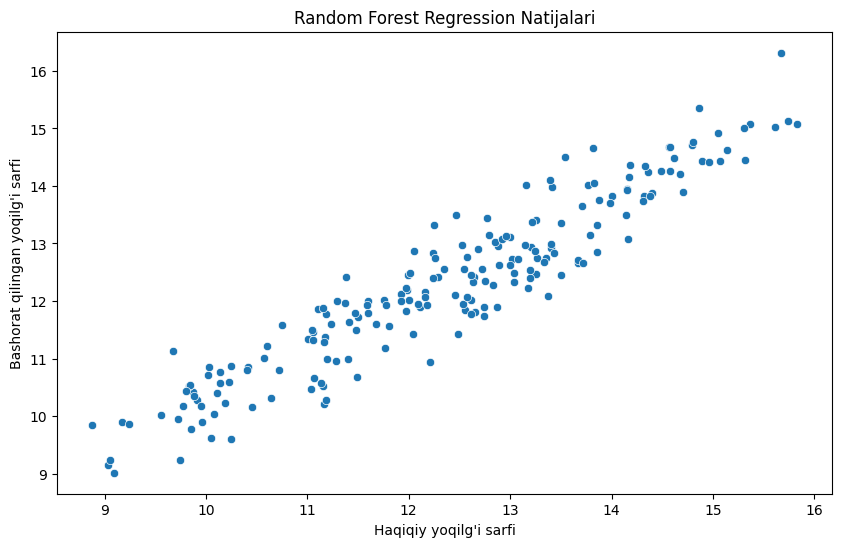

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Haqiqiy yoqilg'i sarfi")
plt.ylabel("Bashorat qilingan yoqilg'i sarfi")
plt.title("Random Forest Regression Natijalari")
plt.show()

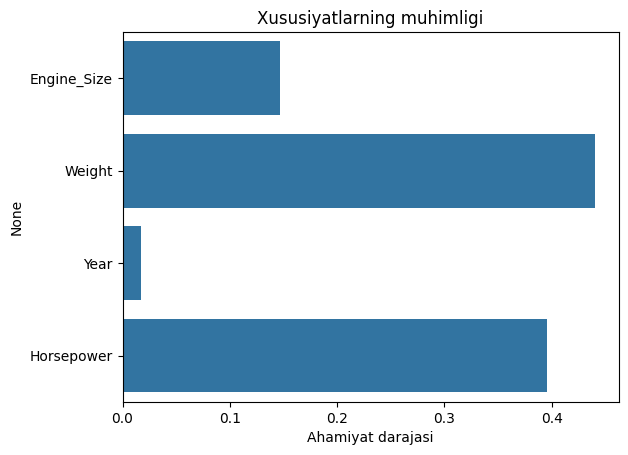

In [ ]:

feature_importances = rf_model.feature_importances_
feature_names = X.columns
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Xususiyatlarning muhimligi")
plt.xlabel("Ahamiyat darajasi")
plt.show()